In [1]:
from scipy import stats
import numpy as np
import pandas as pd

from scipy.stats import norm

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Chi-square test

  - dados numéricos e discretos
  - comparação de 2 ou mais distribuições
    - p.ex. número de escamas de cobras fêmeas, de mesma espécie, em altitudes diferentes
    - são estatisticamente diferentes?
    - coletaremos 5 amostras a 1200 m e 5 amostras a 200 m

### Exemplo 01 - medicina

  - tabela de contingência

In [19]:
# testes x estado de pacientes
cases = np.array([[10, 4], [3, 29]]).T
dfc = pd.DataFrame(cases)
dfc.columns = ['são', 'doente']
dfc.index = ["negativo", "positivo"]
dfc

,são,doente
negativo,10,3
positivo,4,29


### Exemplo 02 - ecologia ~ cobras

In [20]:
chi2, pvalue, dof, expected = stats.chi2_contingency(dfc)
chi2, pvalue, dof, expected 

(15.563342907092908,
 7.978656151116845e-05,
 1,
 array([[ 3.95652174,  9.04347826],
        [10.04347826, 22.95652174]]))

In [16]:
# scales = observed data
scales = np.array([[16, 18, 25, 14, 12], [32, 24, 27, 35, 40]]).T
scales

array([[16, 32],
       [18, 24],
       [25, 27],
       [14, 35],
       [12, 40]])

In [17]:
df = pd.DataFrame(scales)
df.columns = ['alt1200', 'alt200']
df.index = [32, 33, 34, 35, 36]
df

,alt1200,alt200
32,16,32
33,18,24
34,25,27
35,14,35
36,12,40


### Dataframe == tabela de contingência

In [21]:
chi2, pvalue, dof, expected = stats.chi2_contingency(df)
chi2, pvalue, dof, expected 

(9.248974127138686,
 0.055168821766874876,
 4,
 array([[16.79012346, 31.20987654],
        [14.69135802, 27.30864198],
        [18.18930041, 33.81069959],
        [17.1399177 , 31.8600823 ],
        [18.18930041, 33.81069959]]))

In [31]:
"estatística de chi-quadrado %.3f, p-value=%.3e, degree of freedom (dof) = %d"%(chi2, pvalue, dof)

'estatística de chi-quadrado 9.249, p-value=5.517e-02, degree of freedom (dof) = 4'

In [25]:
df

,alt1200,alt200
32,16,32
33,18,24
34,25,27
35,14,35
36,12,40


In [24]:
expected.round(2)

array([[16.79, 31.21],
       [14.69, 27.31],
       [18.19, 33.81],
       [17.14, 31.86],
       [18.19, 33.81]])

In [26]:
scales - expected

array([[-0.79012346,  0.79012346],
       [ 3.30864198, -3.30864198],
       [ 6.81069959, -6.81069959],
       [-3.1399177 ,  3.1399177 ],
       [-6.18930041,  6.18930041]])

### Se a distribuição observada (df) similar à calculada ~ erro próximo de zero

In [27]:
erro = np.sum((scales - expected)**2)
erro

212.2471168013006

### A definição de estatística de chi-quadrado
### soma (observado - esperado)**2 / esperado

In [32]:
chis_stat = np.sum((scales - expected)**2/expected)
chis_stat

9.248974127138686

### Valores experados não se distanciam muito dos observados?

  - não: então as distribuições são similares:     H0  --> p-value < 0.05
  - sim: então as distribuições NÃO são similares: Ha --> p-value >= 0.05

In [35]:
pvalue

0.055168821766874876

In [36]:
if pvalue >= 0.05:
    stri = "não se refuta H0: distribuições estatisticamente similares, statistic = %.3f, p-value = %.3e"%(chi2, pvalue)
else:
    stri = "adota-se a Ha: distribuições estatisticamente diferentes, statistic = %.3f, p-value = %.3e"%(chi2, pvalue)    
stri

'não se refuta H0: distribuições estatisticamente similares, statistic = 9.249, p-value = 5.517e-02'

### A tabela de contingência é de 5 linhas x 2 colunas

In [37]:
scales.shape

(5, 2)

### Graus de liberdade

dof = (nrow - 1) * (ncol -1)

In [38]:
dof = (scales.shape[0]-1) * (scales.shape[1]-1)
dof

4

### Dados mais diferentes: distribuições distintas

In [39]:
# scales = observed data
scales = np.array([[16, 18, 16, 14, 12], [10, 24, 27, 35, 40]]).T
scales

array([[16, 10],
       [18, 24],
       [16, 27],
       [14, 35],
       [12, 40]])

In [41]:
df = pd.DataFrame(scales)
df.columns = ['alt1200', 'alt200']
df.index = [32, 33, 34, 35, 36]
df

,alt1200,alt200
32,16,10
33,18,24
34,16,27
35,14,35
36,12,40


In [42]:
stat = stats.chisquare(scales, axis=None)
stat

Power_divergenceResult(statistic=43.0, pvalue=2.1556072340481466e-06)

In [43]:
def chi2_text(df, verbose=True):
    chi2, p, dof, expected = stats.chi2_contingency(df)

    erro = np.sum((df.to_numpy() - expected)**2)

    if p >= 0.05:
        stri = "não se refuta H0: distribuições estatisticamente similares, statistic = %.3f, p-value = %.3e"%(chi2, p)
    else:
        stri = "adota-se a Ha: distribuições estatisticamente diferentes, statistic = %.3f, p-value = %.3e"%(chi2, p)
        
    if verbose:
        stri += "\nErro total = %d\nGraus de liberdade (dof) = %d"%(erro, dof)
        print(stri)
    
    return chi2, p, dof, expected, erro, stri

In [44]:
chi2, p, dof, expected, erro, stri = chi2_text(df, verbose=True)

adota-se a Ha: distribuições estatisticamente diferentes, statistic = 13.210, p-value = 1.030e-02
Erro total = 220
Graus de liberdade (dof) = 4


### Simulando um afastamento ...

In [49]:
# scales = observed data
scales = np.array([[16, 18, 16, 14, 12], [10, 24, 27, 35, 40]]).T
df = pd.DataFrame(scales)
df.columns = ['alt1200', 'alt200']
df.index = [32, 33, 34, 35, 36]
df

,alt1200,alt200
32,16,10
33,18,24
34,16,27
35,14,35
36,12,40


In [50]:
df.alt200 = df.alt200 + 1
df

,alt1200,alt200
32,16,11
33,18,25
34,16,28
35,14,36
36,12,41


### Simulação de ir aumentando a col

In [52]:
# scales = observed data
scales = np.array([[16, 18, 16, 14, 12], [10, 24, 27, 35, 40]]).T
df = pd.DataFrame(scales)
df.columns = ['alt1200', 'alt200']
df.index = [32, 33, 34, 35, 36]
df

for i in range(5):
    print('%d)', i)
    df.alt200 = df.alt200 -1
    chi2, p, dof, expected, erro, stri = chi2_text(df, verbose=True)
    print('-----------')
    

%d) 0
adota-se a Ha: distribuições estatisticamente diferentes, statistic = 13.949, p-value = 7.458e-03
Erro total = 227
Graus de liberdade (dof) = 4
-----------
%d) 1
adota-se a Ha: distribuições estatisticamente diferentes, statistic = 14.772, p-value = 5.198e-03
Erro total = 235
Graus de liberdade (dof) = 4
-----------
%d) 2
adota-se a Ha: distribuições estatisticamente diferentes, statistic = 15.691, p-value = 3.464e-03
Erro total = 243
Graus de liberdade (dof) = 4
-----------
%d) 3
adota-se a Ha: distribuições estatisticamente diferentes, statistic = 16.722, p-value = 2.189e-03
Erro total = 251
Graus de liberdade (dof) = 4
-----------
%d) 4
adota-se a Ha: distribuições estatisticamente diferentes, statistic = 17.886, p-value = 1.299e-03
Erro total = 260
Graus de liberdade (dof) = 4
-----------


In [53]:
df

,alt1200,alt200
32,16,5
33,18,19
34,16,22
35,14,30
36,12,35


### Se eu tiver 3 altitude (0m, 200m, 1200m)
### Grau de liberdade vai mudar
### Erro tende a aumentar

In [54]:
# scales = observed data
scales = np.array([[16, 18, 16, 14, 12], [10, 24, 27, 35, 40]]).T
print(scales)

df = pd.DataFrame(scales)
df.columns = ['alt1200', 'alt200']


chi2, p, dof, expected, erro, stri = chi2_text(df, verbose=True)

[[16 10]
 [18 24]
 [16 27]
 [14 35]
 [12 40]]
adota-se a Ha: distribuições estatisticamente diferentes, statistic = 13.210, p-value = 1.030e-02
Erro total = 220
Graus de liberdade (dof) = 4


In [55]:
# scales = observed data
scales = np.array([[16, 15, 14, 12, 15], [16, 18, 16, 14, 12], [10, 24, 27, 35, 40]]).T
print(scales)

df = pd.DataFrame(scales)
df.columns = ['alt0', 'alt1200', 'alt200']

chi2, p, dof, expected, erro, stri = chi2_text(df, verbose=True)

[[16 16 10]
 [15 18 24]
 [14 16 27]
 [12 14 35]
 [15 12 40]]
adota-se a Ha: distribuições estatisticamente diferentes, statistic = 17.159, p-value = 2.850e-02
Erro total = 325
Graus de liberdade (dof) = 8


### Distribuição chi-quadrado

In [56]:
# 2 altitudes
scales = np.array([[16, 18, 16, 14, 12], [10, 24, 27, 35, 40]]).T
df1 = pd.DataFrame(scales)
df1.columns = ['alt1200', 'alt200']

# 3 altitudes
scales = np.array([[16, 15, 14, 12, 15], [16, 18, 16, 14, 12], [10, 24, 27, 35, 40]]).T
df2 = pd.DataFrame(scales)
df2.columns = ['alt0', 'alt1200', 'alt200']

# 5 altitudes
scales = np.array([[16, 18, 16, 14, 10], 
                   [17, 19, 16, 13, 15],
                   [32, 24, 18, 11, 12],
                   [16, 18, 12, 16, 12],
                   [20, 18, 18, 16, 11]]).T
df3 = pd.DataFrame(scales)
df3.columns = ['alt0', 'alt1', 'alt2', 'alt1200', 'alt200']


0 4 13.209586367265107 blue
1 8 17.158639016745646 green
2 16 9.412990915319478 red


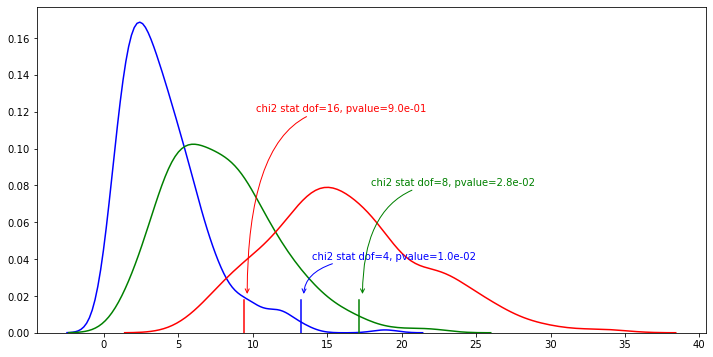

In [57]:
N = 300
colors = ['blue', 'green', 'red']

fig = plt.figure(figsize=(12,6))

for i in range(3):
    if   i == 0: df = df1
    elif i == 1: df = df2
    else:        df = df3
        
    color = colors[i]
    chi2, p, dof, expected, erro, stri = chi2_text(df, verbose=False)
    print(i, dof, chi2, color)

    ax = sns.distplot(np.random.chisquare(df=dof, size=N), hist=False, color=color);


    ax.annotate('chi2 stat dof=%d, pvalue=%.1e'%(dof, p), xy=(chi2+.21, 0.02), xytext=(chi2+.8, 0.04*(i+1)),
                color = color,
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="angle3,angleA=0,angleB=-90", color=color));
    
    ax.axvline(x=chi2, ymin=0, ymax=.1, color=color)


### Uma distribuição normal - contínua

 - media - mean - loc
 - desvio padrão - scale

In [ ]:
mu  = 2
sdv = 4
N   = 1000

samples = np.random.normal(loc=mu, scale=sdv, size=N)
len(samples), np.min(samples), np.max(samples)

In [ ]:
muc = np.mean(samples)
sdvc = np.std(samples)

muc, sdvc

In [ ]:
fig = plt.figure(figsize=(12, 6))

ax = sns.distplot(samples, kde=False, rug=True, norm_hist=True,);
plt.vlines(muc, 0, 0.1, color = 'black');
plt.hlines(0.06, muc, muc+sdvc, color = 'red');

seqx = np.linspace(stats.norm.ppf(0.01, muc, sdvc), stats.norm.ppf(0.99, muc, sdvc), 100)
sns.lineplot(seqx, stats.norm.pdf(seqx, muc, sdvc), color='navy');

### Distância entre distribuições

In [ ]:
mus = [1, 3]
sds = [0.3, 0.8]
N = 1000

j0 = np.random.normal(mus[0], sds[0], N)
j1 = np.random.normal(mus[1], sds[1], N)

df = pd.DataFrame([j0, j1]).T
df.columns=['dist1', 'dist2']
df.head(3)

### Duas distribuições sobrepostas

In [ ]:
colors = ['red', 'blue']
fig = plt.figure(figsize=(12, 6))

for i in range(2):
    sns.distplot(df['dist%d'%(i+1)], color=colors[i], hist=True, kde=True, rug=True,
                rug_kws={"color": colors[i], "alpha": .2,})

mu1 = df.dist1.mean()
sd1 = df.dist1.std()

mu2 = df.dist2.mean()
sd2 = df.dist2.std()

    
title  =   "Distribuição 1 (vermelha) tem média = %.1f e SSD = %.2f"%(mu1, sd1)
title += "\nDistribuição 2 (azul) tem média = %.1f e SSD = %.2f"%(mu2, sd2)
plt.title(title);

### Criando o eixo x

In [ ]:
seqxs = []
seqx1 = np.linspace(stats.norm.ppf(0.01, mus[0], sds[0]), stats.norm.ppf(0.99, mus[0], sds[0]), 100)
seqxs.append(seqx1)
seqx1[:5], seqx1[-10:-1]

In [ ]:
seqx2 = np.linspace(stats.norm.ppf(0.01, mus[1], sds[1]), stats.norm.ppf(0.99, mus[1], sds[1]), 100)
seqxs.append(seqx2)
seqx2[:5], seqx2[-10:-1]

### Teste t

statistician William Sealy Gosset 

<font size="5">t-stat = $\frac{<X>-\mu}{\frac{S}{\sqrt(n)}}$</font>

In [ ]:
sta, pval = stats.ttest_ind(df.dist1, df.dist2)
sta, pval

alpha=0.05

#text_stat = "t-test statistics = %.2f, p-val = %.2e"%(sta, pval)
text_stat = "estatística t-test = %.2f, p-val = %.2e"%(sta, pval)

if pval < alpha:
    # text_stat = 'Statiscally distinct, H0 must be refuted ' + text_stat
    text_stat = 'Distribuições estatiscamente diferentes, H0 precisa ser refutado\n' + text_stat
else:
    #text_stat = 'Statiscally similar, H0 must be accepetd ' + text_stat
    text_stat = 'Distribuições estatiscamente similar, H0 precisa ser aceito\n' + text_stat

text_stat    

### Coeficiente de variação

<font size="5">$CV = \frac{SD}{mu}$</font>

### Tamanho do efeito (effect size)

https://en.wikipedia.org/wiki/Effect_size

<font size="5">$\theta = \frac{\mu_1 -\mu_2}{SD}$</font>

### Tamanho do efeito (effect size)

https://en.wikipedia.org/wiki/Effect_size

<font size="5">$\theta = \frac{\mu_1 -\mu_2}{SD}$</font>


### Markdown

https://csrgxtu.github.io/2015/03/20/Writing-Mathematic-Fomulars-in-Markdown/ 
    
https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html
    

### Revendo o gráfico com todas as estatísticas

In [ ]:
colors = ['red', 'blue']
fig = plt.figure(figsize=(14, 7))

for i in range(2):
    sns.distplot(df['dist%d'%(i+1)], color=colors[i], kde=False, rug=True, norm_hist=True,
                rug_kws={"color": colors[i], "alpha": .2,})
    
    sns.lineplot(seqxs[i], stats.norm.pdf(seqxs[i], mus[i], sds[i]), color=colors[i])

mu1 = df.dist1.mean()
sd1 = df.dist1.std()

mu2 = df.dist2.mean()
sd2 = df.dist2.std()

plt.axvline(x=mus[0], ymin=0, ymax=1.4, color='black')
plt.axvline(x=mus[0]+sds[0], ymin=0, ymax=1.0, color='black', linestyle='--')
plt.axvline(x=mus[0]-sds[0], ymin=0, ymax=1.0, color='black', linestyle='--')

plt.axvline(x=mus[1], ymin=0, ymax=.6, color='black')
plt.axvline(x=mus[1]+sds[1], ymin=0, ymax=.4, color='black', linestyle='--')
plt.axvline(x=mus[1]-sds[1], ymin=0, ymax=.4, color='black', linestyle='--')

head_width = 0.05

# nsamp = N*sqrt(sds[0]**2/n**2 + sds[1]**2/n**2)
SSD = np.sqrt(sds[0]**2 + sds[1]**2)
EffSize = (mus[1] - mus[0]) / SSD

diff = mus[1]-mus[0]
xdiff = mus[1] - (diff/2)
yarrow = 0.7

plt.arrow(mus[0], yarrow, (diff-2*head_width), 0, head_width=head_width, head_length=0.1, fc='k', ec='k')

text = '$\\theta$ = %.2f, diff = %.1f, SSD = %.2f'%(EffSize, diff, SSD)
plt.text(x=(xdiff-.65), y=(yarrow+.1), s=text)
plt.xlabel("values")
plt.ylabel("percentage (%)")
     
title  =   "Distribuição 1 (vermelha) tem media (SSD) = %.1f (%.2f) e n = %d amostras"%(mu1, sd1, N)
title += "\nDistribuição 2 (azul) tem media (SSD) = %.1f (%.2f) e n = %d amostras"%(mu2, sd2, N)
title += '\n' + text_stat + '\nTamanho do efeito = %.2f'%(EffSize)
plt.title(title);

### Fazendo um stack para o barplot

In [ ]:
df2 = pd.DataFrame(df.dist1)
df2['class'] = 'um'
df2.columns = ['val', 'class']

dfa = pd.DataFrame(df.dist2)
dfa['class'] = 'dois'
dfa.columns = ['val', 'class']

# df2 = pd.concat([df2, dfa])
df2 = df2.append(dfa)
df2.tail(3)

### Barplot invertido

In [ ]:
fig = plt.figure(figsize=(14, 7))
#sns.set(rc={"figure.figsize": (6,4)})
sns.violinplot(x="val", y="class", data=df2, palette=['red', 'blue']) # , saturation=.05)
plt.title("Distribuições");

In [ ]:
from matplotlib import gridspec

# f, axes = plt.subplots(2, 1, figsize=(14, 16), sharex=True)

colors = ['red', 'blue']
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 1, height_ratios=[5, 2])

axes = []
axes.append(plt.subplot(gs[0]))
axes.append(plt.subplot(gs[1]))

mu1 = df.dist1.mean()
sd1 = df.dist1.std()

mu2 = df.dist2.mean()
sd2 = df.dist2.std()

for i in range(2):
    sns.distplot(df['dist%d'%(i+1)], color=colors[i], kde=False, rug=True, norm_hist=True,
                rug_kws={"color": colors[i], "alpha": .2,}, ax=axes[0])
    
    sns.lineplot(seqxs[i], stats.norm.pdf(seqxs[i], mus[i], sds[i]), color=colors[i], ax=axes[0])



axes[0].axvline(x=mus[0], ymin=0, ymax=1.4, color='black')
axes[0].axvline(x=mus[0]+sds[0], ymin=0, ymax=1.0, color='black', linestyle='--')
axes[0].axvline(x=mus[0]-sds[0], ymin=0, ymax=1.0, color='black', linestyle='--')

axes[0].axvline(x=mus[1], ymin=0, ymax=.6, color='black')
axes[0].axvline(x=mus[1]+sds[1], ymin=0, ymax=.4, color='black', linestyle='--')
axes[0].axvline(x=mus[1]-sds[1], ymin=0, ymax=.4, color='black', linestyle='--')

head_width = 0.05

# nsamp = N*sqrt(sds[0]**2/n**2 + sds[1]**2/n**2)
SSD = np.sqrt(sds[0]**2 + sds[1]**2)
EffSize = (mus[1] - mus[0]) / SSD

diff = mus[1]-mus[0]
xdiff = mus[1] - (diff/2)
yarrow = 0.7

axes[0].arrow(mus[0], yarrow, (diff-2*head_width), 0, head_width=head_width, head_length=0.1, fc='k', ec='k')

text = '$\\theta$ = %.2f, diff = %.1f, SSD = %.2f'%(EffSize, diff, SSD)
axes[0].text(x=(xdiff-.65), y=(yarrow+.1), s=text)
axes[0].set_xlabel("values")
axes[0].set_ylabel("percentage (%)")
     
title  =   "Distribuição 1 (vermelha) tem media (SSD) = %.1f (%.2f) e n = %d amostras"%(mu1, sd1, N)
title += "\nDistribuição 2 (azul) tem media (SSD) = %.1f (%.2f) e n = %d amostras"%(mu2, sd2, N)
title += '\n' + text_stat + '\nTamanho do efeito = %.2f'%(EffSize)
axes[0].set_title(title);

df2 = pd.DataFrame(df.dist1)
df2['class'] = 'um'
df2.columns = ['val', 'class']

dfa = pd.DataFrame(df.dist2)
dfa['class'] = 'dois'
dfa.columns = ['val', 'class']

# df2 = pd.concat([df2, dfa])
df2 = df2.append(dfa)

sns.violinplot(x="val", y="class", data=df2, palette=['red', 'blue'], ax=axes[1]); # , saturation=.05)

In [ ]:
def plot_2_distributions(df, xlim, alpha=0.05):

    colors = ['red', 'blue']
    fig = plt.figure(figsize=(14, 7))
    gs = gridspec.GridSpec(2, 1, height_ratios=[5, 2]) 

    axes = []
    axes.append(plt.subplot(gs[0]))
    axes.append(plt.subplot(gs[1]))


    for i in range(2):
        sns.distplot(df['dist%d'%(i+1)], color=colors[i], kde=False, rug=True, norm_hist=True,
                    rug_kws={"color": colors[i], "alpha": .2,}, ax=axes[0])

        sns.lineplot(seqxs[i], stats.norm.pdf(seqxs[i], mus[i], sds[i]), color=colors[i], ax=axes[0])

        
    #----------- statistics --------------------
    #-- ttest
    
    sta, pval = stats.ttest_ind(df.dist1, df.dist2)
    #text_stat = "t-test statistics = %.2f, p-val = %.2e"%(sta, pval)
    text_stat = "estatística t-test = %.2f, p-val = %.2e"%(sta, pval)

    if pval < alpha:
        # text_stat = 'Statiscally distinct, H0 must be refuted ' + text_stat
        text_stat = 'Distribuições estatiscamente diferentes, H0 precisa ser refutado\n' + text_stat
    else:
        #text_stat = 'Statiscally similar, H0 must be accepetd ' + text_stat
        text_stat = 'Distribuições estatiscamente similar, H0 precisa ser aceito\n' + text_stat
    
    #-- params
    mu1 = df.dist1.mean()
    sd1 = df.dist1.std()

    mu2 = df.dist2.mean()
    sd2 = df.dist2.std()

    axes[0].axvline(x=mus[0], ymin=0, ymax=1.4, color='black')
    axes[0].axvline(x=mus[0]+sds[0], ymin=0, ymax=1.0, color='black', linestyle='--')
    axes[0].axvline(x=mus[0]-sds[0], ymin=0, ymax=1.0, color='black', linestyle='--')

    axes[0].axvline(x=mus[1], ymin=0, ymax=.6, color='black')
    axes[0].axvline(x=mus[1]+sds[1], ymin=0, ymax=.4, color='black', linestyle='--')
    axes[0].axvline(x=mus[1]-sds[1], ymin=0, ymax=.4, color='black', linestyle='--')

    head_width = 0.05

    # nsamp = N*sqrt(sds[0]**2/n**2 + sds[1]**2/n**2)
    SSD = np.sqrt(sds[0]**2 + sds[1]**2)
    EffSize = (mus[1] - mus[0]) / SSD

    diff = mus[1]-mus[0]
    xdiff = mus[1] - (diff/2)
    yarrow = 0.7

    # axes[0].arrow(mus[0], yarrow, (diff-2*head_width), 0, head_width=head_width, head_length=0.1, fc='k', ec='k')

    text = '$\\theta$ = %.2f, diff = %.1f, SSD = %.2f'%(EffSize, diff, SSD)
    # axes[0].text(x=(xdiff-.65), y=(yarrow+.1), s=text)
    axes[0].set_xlabel("values")
    axes[0].set_ylabel("percentage (%)")
    axes[0].set_xlim(xlim);

    title  =   "Distribuição 1 (vermelha) tem media (SSD) = %.1f (%.2f) e n = %d amostras"%(mu1, sd1, N)
    title += "\nDistribuição 2 (azul) tem media (SSD) = %.1f (%.2f) e n = %d amostras"%(mu2, sd2, N)
    title += '\n' + text_stat + '\nTamanho do efeito = %.2f, distância = %.1f, SSDtot = %.2f'%(EffSize, diff, SSD)
    axes[0].set_title(title);
    
    #--- concat dist1, dist2
    df2 = pd.DataFrame(df.dist1)
    df2['class'] = 'um'
    df2.columns = ['val', 'class']

    dfa = pd.DataFrame(df.dist2)
    dfa['class'] = 'dois'
    dfa.columns = ['val', 'class']

    # df2 = pd.concat([df2, dfa])
    df2 = df2.append(dfa)


    sns.violinplot(x="val", y="class", data=df2, palette=['red', 'blue'], ax=axes[1]); # , saturation=.05)
    axes[1].set_xlim(xlim);

In [ ]:
from scipy.stats import norm

mus = [1, 1.4]
sds = [0.4, 0.3]
xlim = [mus[0]-4*sds[0], mus[1]+4*sds[1]]
N = 12

j0 = np.random.normal(mus[0], sds[0], N)
j1 = np.random.normal(mus[1], sds[1], N)

df = pd.DataFrame([j0, j1]).T
df.columns=['dist1', 'dist2']

plot_2_distributions(df, xlim)